## Cluster size
The goal of this analysis is to explore the size of phylogenetic clusters by gene & by deletion type.

In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [85]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [86]:
genes = ['ORF1a','ORF1b','S','ORF3a','E','M','ORF6','ORF7a','ORF7b','ORF8','N','ORF9b']

In [87]:
dfs = []
for gene in genes:
    with open('results/clustersDepths/clusters_'+gene+'.tsv','r') as f:
        df = pd.read_csv(f,sep='\t')
        dfs.append(df)

In [101]:
pos = np.arange(len(dfs))

dataList = []
for i,gene in zip(pos,genes):
    values,counts = np.unique(dfs[i].cluster,return_counts=True)
    countDF = pd.DataFrame({'cluster':values,'clustSize':counts})
    typeDF = dfs[i][[gene+'_koType','cluster']].drop_duplicates().rename(columns={gene+'_koType':'koType'})
    df = dfs[i][['cluster','depth']].drop_duplicates().merge(countDF).merge(typeDF)
    df['gene'] = gene
    #data.append(counts)
    dataList.append(df)

data = pd.concat(dataList)

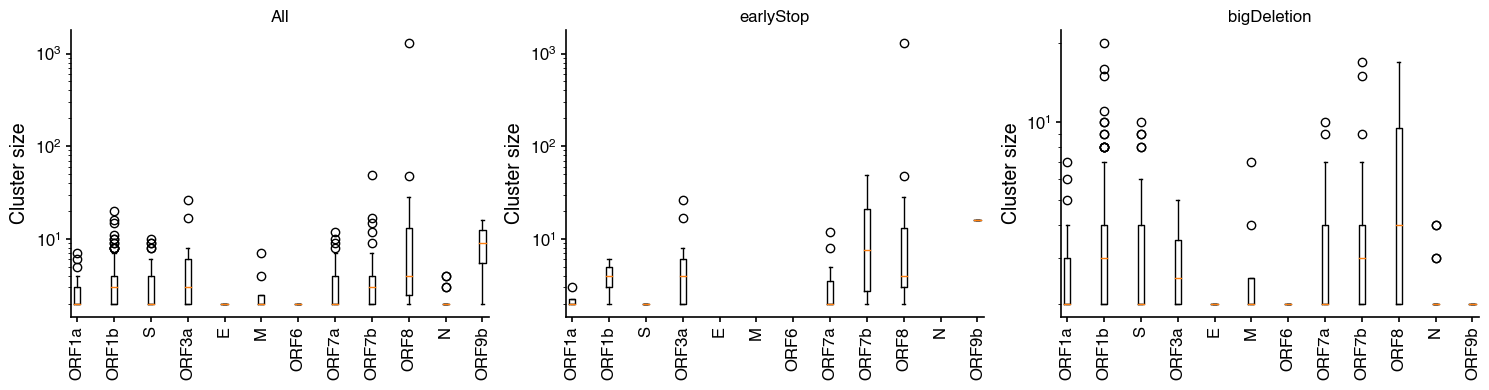

In [107]:
positions = 3*pos

fig,ax = plt.subplots(ncols = 3, tight_layout=True,figsize=(15,4))
for i, lab in zip(range(3),['All','earlyStop','bigDeletion']):
    if lab == 'All':
        d = [data.loc[(data['gene'] == gene) & (data['clustSize']>1) & (data['depth']>2),'clustSize'] for gene in genes]
    else:
        d = [data.loc[(data['gene'] == gene) &(data['koType']==lab) & (data['clustSize']>1) & (data['depth']>2),'clustSize'] for gene in genes]
    #ax[i].violinplot(data,positions=positions+0.75,showextrema=False)
    ax[i].boxplot(d,positions=positions+0.75)
    ax[i].set_xticks(positions+0.75,genes)
    ax[i].set_yscale('log')
    ax[i].set_xticklabels(genes,rotation=90)
    ax[i].set_ylabel('Cluster size')
    ax[i].set_title(lab)
#fig.savefig('figs/clustSize_gene_boxplot.pdf',dpi=300,bbox_inches='tight')


ValueError: zero-size array to reduction operation minimum which has no identity

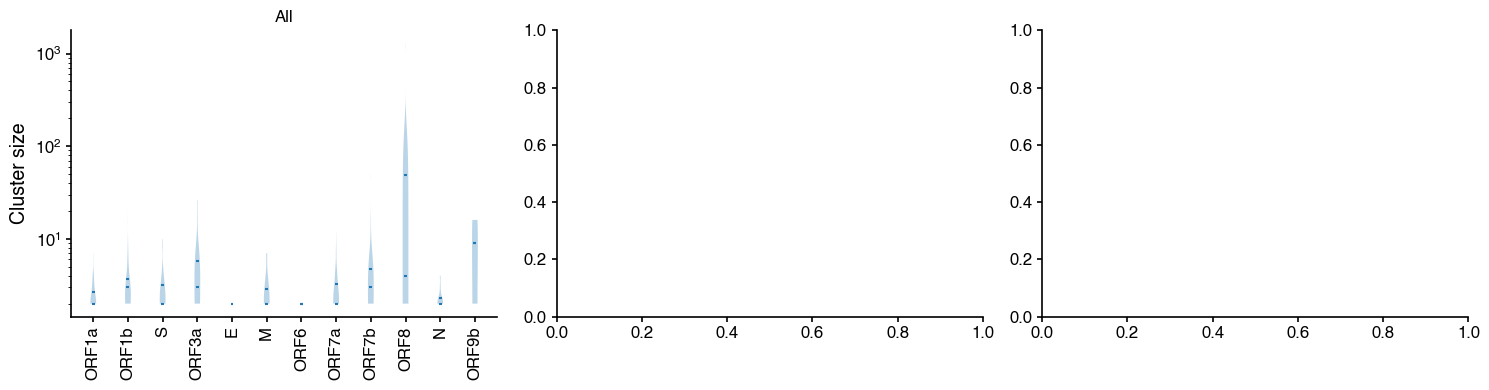

In [82]:
positions = 3*pos

fig,ax = plt.subplots(ncols = 3, tight_layout=True,figsize=(15,4))
for i, d,lab in zip(range(3),[data,dataES,dataBD],['All KO','EarlyStop','BigDeletion']):
    locs = positions.copy()
    for j,sizes in reversed(list(enumerate(d))):
        if not len(sizes):
            d = np.delete(d,j)
            locs = np.delete(locs,j)
    ax[i].violinplot(d,positions=np.asarray(locs)+0.75,showextrema=False,showmedians=True, showmeans=True)
    #x[i].boxplot(d,positions=positions+0.75)
    ax[i].set_xticks(positions+0.75,genes)
    ax[i].set_yscale('log')
    ax[i].set_xticklabels(genes,rotation=90)
    ax[i].set_ylabel('Cluster size')
    ax[i].set_title(lab)
#fig.savefig('figs/clustSize_gene_violinmpl.pdf',dpi=300,bbox_inches='tight')


In [94]:
geneNames = []
clustSize = []
for gene, g in zip(genes,dataES):
    for size in g:
        clustSize.append(size)
        geneNames.append(gene)
seadfES = pd.DataFrame({'gene':geneNames, 'clustSize':clustSize, 'koType':'earlyStop'})

geneNames = []
clustSize = []
for gene, g in zip(genes,dataBD):
    for size in g:
        clustSize.append(size)
        geneNames.append(gene)
seadfBD = pd.DataFrame({'gene':geneNames, 'clustSize':clustSize, 'koType':'bigdeletion'})

seadf = pd.concat([seadfBD,seadfES])


/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_74778/3842425944.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


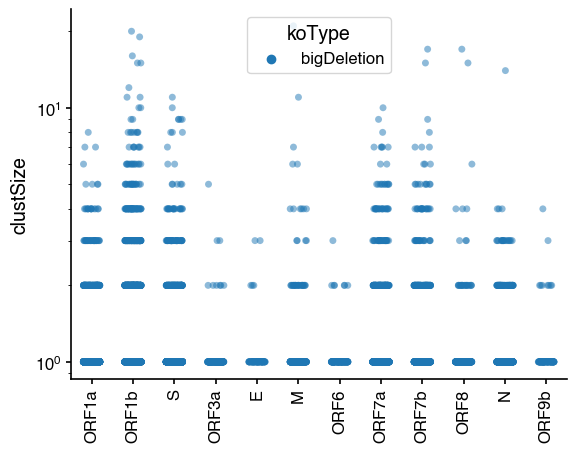

In [112]:
ax = sns.stripplot(x='gene', y='clustSize',hue='koType', data=data[data.koType=='bigDeletion'], jitter=0.2,alpha=0.5)
sns.despine()
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('')
fig = ax.get_figure()
#fig.savefig('figs/clustSize_gene_stripplot_new.pdf',dpi=300,bbox_inches='tight')

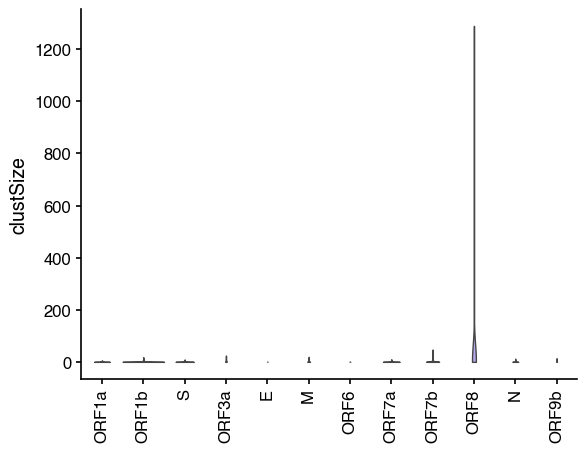

In [68]:
ax = sns.violinplot(x='gene', y='clustSize', data=seadf, cut=0, inner=None,width=1,linewidth=1,scale='count')
sns.despine()
#ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('')
fig = ax.get_figure()
fig.savefig('figs/clustSize_gene_violinplot_new.pdf',dpi=300,bbox_inches='tight')